#### Importation des Bibliothèques utiles pour le projet

In [ ]:
from faker import Faker # Pour générer des données fictives

import pandas as pd # Bibliothèque par excellence pour l'analyse des données avec Python
import numpy as np # Pour effectuer des calculs
import random # Pour générer des données aléatoires
from datetime import datetime, timedelta # Pour la gestion des dates
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Pour la médélisation

#### Création de la base de données et insertion des données

In [ ]:
# INITIALISATION
fake = Faker('fr_FR')
NB_EMPLOYES = 2500  # Pour une meilleure simulation

DEPARTEMENTS = ['Ventes', 'Marketing', 'IT', 'RH', 'Finance', 'Service Client', 'Réseaux', 'Logistique']
CATEGORIES = ['Cadre', 'Maîtrise', 'Employé']
TYPES_CONTRAT = ['CDI', 'CDD', 'Stage']

# Génération des données
data = []
for i in range(1, NB_EMPLOYES + 1):
    sexe = np.random.choice(['Homme', 'Femme'], p=[0.6, 0.4])
    departement = random.choice(DEPARTEMENTS)
    anciennete_jours = random.randint(100, 2000)
    anciennete_mois = anciennete_jours // 30

    # 15. Article 21 - Non-discrimination liée au sexe
    if sexe == 'Femme' and random.random() < 0.3: # 30% des femmes sont dans des postes de responsabilités
        categorie = np.random.choice(['Cadre', 'Maîtrise'], p=[0.4, 0.6])
    elif sexe == 'Femme' and random.random() < 0.7:
        categorie = 'Employé'
    else: # Hommes
        categorie = np.random.choice(CATEGORIES, p=[0.2, 0.5, 0.3])

    # 12. Article 25 - Classification professionnelle
    poste = random.choice([p for p in ['Directeur', 'Manager', 'Analyste', 'Assistant'] if (p=='Directeur' and categorie=='Cadre') or (p=='Manager' and categorie=='Maîtrise') or (p=='Analyste' and categorie=='Maîtrise') or (p=='Assistant' and categorie=='Employé')])

    # Dates d'embauche et d'essai
    date_embauche = fake.date_time_between(start_date=f'-{anciennete_jours}d', end_date='now')

    # 16. Article 23 - Période d'essai
    duree_essai_legale = 0
    if categorie == 'Cadre': duree_essai_legale = 6
    elif categorie == 'Maîtrise': duree_essai_legale = 3
    else: duree_essai_legale = 1

    duree_essai_effective = random.randint(duree_essai_legale - 1, duree_essai_legale + 3) # Simuler des non-conformités
    date_fin_essai = date_embauche + timedelta(days=duree_essai_effective * 30)

    # 17. Article 24 - Renouvellement du CDD
    type_contrat = random.choice(TYPES_CONTRAT)
    nb_renouvellements_cdd = 0
    if type_contrat == 'CDD':
        if anciennete_mois > 12: nb_renouvellements_cdd = random.randint(1, 3)

    # 18. Article 28 - Reclassement après intérim (simulé)
    reclassement = 'Non'
    if anciennete_mois > 18 and categorie == 'Maîtrise' and random.random() < 0.2: # 20% de chance d'être non reclassé
        reclassement = 'Non'
    else:
        reclassement = 'Oui'

    # Reste des données et règles
    turnover = np.random.choice([0, 1], p=[0.9, 0.1]) if departement not in ['Service Client'] else np.random.choice([0, 1], p=[0.7, 0.3])
    salaire = random.randint(600000, 1500000)

    # 14. Alignement des salaires
    if categorie == 'Cadre' and salaire < 1200000:
        salaire = random.randint(1200000, 2500000)

    performance = random.uniform(2, 5)

    # 20. Article 57 - Revalorisation salariale
    revalorisation = 'Non'
    if anciennete_mois > 36 and random.random() > 0.3: # Simuler des cas non revalorisés
        revalorisation = 'Non'
    else:
        revalorisation = 'Oui'

    # 21. Article 59 - Avancement d'échelon
    avancement_echelon = 'Non'
    if performance > 4 and anciennete_mois > 12 and random.random() < 0.2: # 20% de non avancement
        avancement_echelon = 'Non'
    else:
        avancement_echelon = 'Oui'

    # 5. & 9. Engagement et satisfaction
    score_satisfaction = random.randint(1, 5)
    if salaire < 600000 or performance < 3: score_satisfaction = random.randint(1, 3)

    # 8. Stress des employés
    heures_supp = 0
    if score_satisfaction < 3: heures_supp = random.randint(20, 80)
    else: heures_supp = random.randint(0, 15)

    data.append([
        i, fake.name(), sexe, departement, poste, categorie, salaire, performance, 'Inactif' if turnover == 1 else 'Actif',
        anciennete_mois, date_embauche, date_fin_essai, type_contrat, nb_renouvellements_cdd, reclassement, revalorisation,
        avancement_echelon, score_satisfaction, heures_supp
    ])

# Création du DataFrame et sauvegarde
colonnes = [
    'ID_Employe', 'Nom', 'Sexe', 'Departement', 'Poste', 'Categorie', 'Salaire', 'Performance', 'Statut_Emploi',
    'Anciennete_Mois', 'Date_Embauche', 'Date_Fin_Essai', 'Type_Contrat', 'Nb_Renouvellements_CDD', 'Reclassement_OK',
    'Revalorisation_Salariale', 'Avancement_Echelon_OK', 'Score_Satisfaction', 'Heures_Supplementaires'
]
df_employes = pd.DataFrame(data, columns=colonnes)
df_employes.to_csv('donnees_rh_mtn_complet.csv', index=False)

print("Jeu de données complet généré et sauvegardé dans 'donnees_rh_mtn_complet.csv'.")

Jeu de données complet généré et sauvegardé dans 'donnees_rh_mtn_complet.csv'.


#### Analyse Exploratoire des Données (EDA)

##### Aperçu et Statistiques descriptives

In [ ]:
import pandas as pd

# Charger le jeu de données
df = pd.read_csv('donnees_rh_mtn_complet.csv')

# Afficher les premières lignes du DataFrame
print("Aperçu des 5 premières lignes du jeu de données :\n", df.head())

# Afficher les informations sur les colonnes
print("\nInformations sur le jeu de données :\n")
df.info()

# Statistiques descriptives pour les colonnes numériques
print("\nStatistiques descriptives pour les données numériques :\n", df.describe())

Aperçu des 5 premières lignes du jeu de données :
    ID_Employe                         Nom   Sexe     Departement      Poste  \
0           1       Christiane du Leclerc  Homme              RH   Analyste   
1           2              Dorothée Andre  Femme  Service Client  Assistant   
2           3          Frédéric Le Renaud  Homme      Logistique    Manager   
3           4  David Guillet de la Marion  Homme          Ventes  Assistant   
4           5               Roland Dijoux  Homme              RH   Analyste   

  Categorie  Salaire  Performance Statut_Emploi  Anciennete_Mois  \
0  Maîtrise   918266     2.219044         Actif               36   
1   Employé   962765     2.549309       Inactif               58   
2  Maîtrise  1015091     4.049678         Actif               42   
3   Employé   678478     4.470487         Actif               61   
4  Maîtrise  1221298     4.137890       Inactif               23   

                Date_Embauche              Date_Fin_Essai Type_Co

L'analyse des sorties nous permet déjà de tirer plusieurs conclusions clés:

**Structure et volume des données** : Le DataFrame contient 2500 entrées et 19 colonnes. Cela nous donne un jeu de données suffisamment grand pour que les analyses et les prédictions soient significatives.

**Qualité des données** : La ligne Non-Null Count pour toutes les colonnes indique 2500, ce qui signifie qu'il n'y a aucune donnée manquante. C'est un point fort que vous pouvez souligner, car la gestion des données manquantes est souvent un défi en Data Science.

**Types de données** : Le tableau df.info() nous montre les types de données. Les colonnes comme Salaire, Performance et Anciennete_Mois sont bien reconnues comme des données numériques (int64 ou float64), ce qui est idéal pour les calculs. Les colonnes comme Departement et Statut_Emploi sont des objets (object), ce qui est normal car elles contiennent du texte. Elles devront être converties pour le modèle de Machine Learning.

**Statistiques clés** : La table df.describe() est très riche. On peut y voir
- **la moyenne des salaires (environ 1,15 million de FCFA)**,
- **l'ancienneté moyenne des employés (environ 34,5 mois)**,
- les statistiques sur les heures supplémentaires et le score de satisfaction.
- La moyenne des heures supplémentaires est de 27,31, mais le 75ème percentile est à 48 heures, ce qui suggère une charge de travail potentiellement élevée pour un quart des employés.

##### Analyse des problématiques par la visualisation

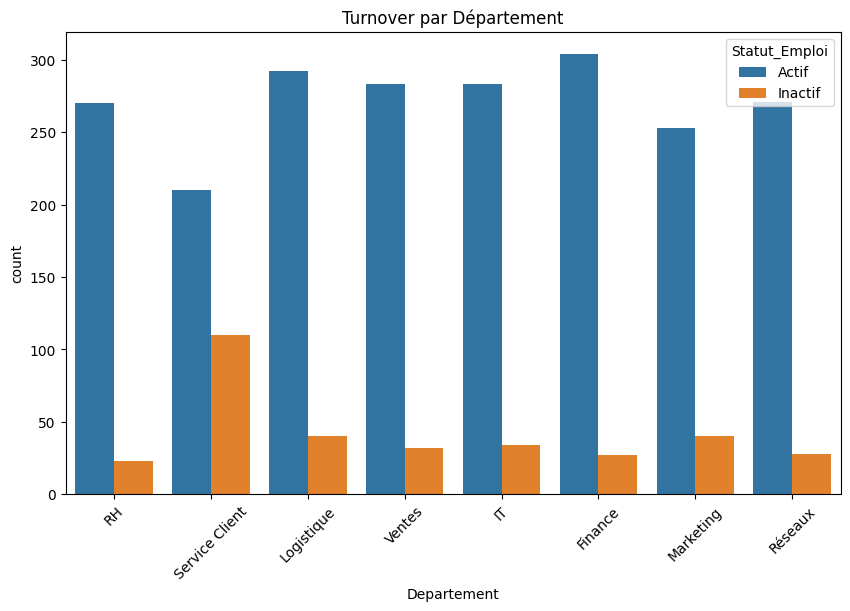


--- Analyse du turnover par département ---
Statut_Emploi      Actif   Inactif
Departement                       
Finance         0.918429  0.081571
IT              0.892744  0.107256
Logistique      0.879518  0.120482
Marketing       0.863481  0.136519
RH              0.921502  0.078498
Réseaux         0.906355  0.093645
Service Client  0.656250  0.343750
Ventes          0.898413  0.101587


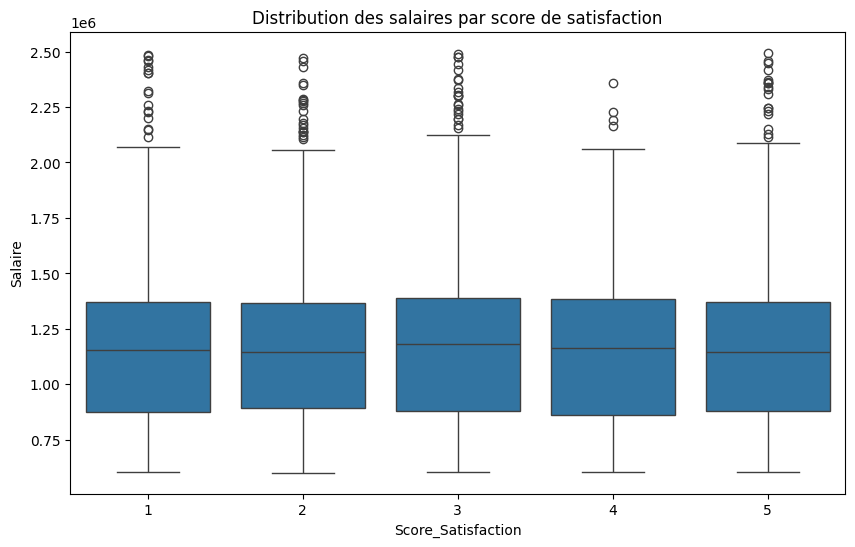


--- Salaire moyen par score de satisfaction ---
Score_Satisfaction
1    1.148749e+06
2    1.158238e+06
3    1.184415e+06
4    1.155088e+06
5    1.175297e+06
Name: Salaire, dtype: float64


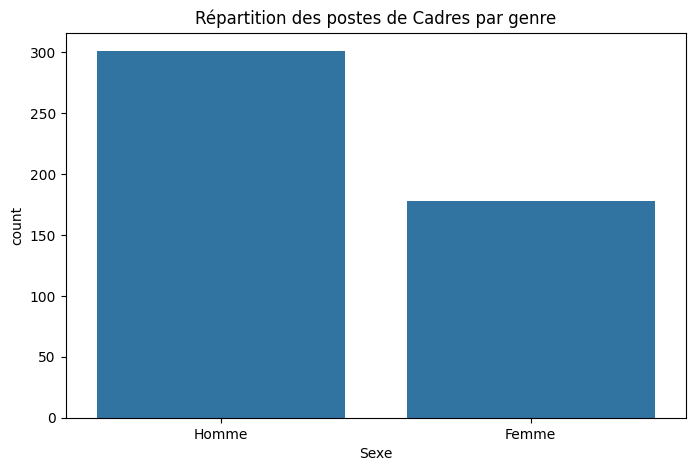


--- Répartition des postes de Cadres par Sexe ---
Sexe
Homme    0.628392
Femme    0.371608
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation 1 : Taux de turnover par département
plt.figure(figsize=(10, 6))
sns.countplot(x='Departement', hue='Statut_Emploi', data=df)
plt.title('Turnover par Département')
plt.xticks(rotation=45)
plt.show()

# Explication : Confirmer que le turnover est élevé dans certains départements
print("\n--- Analyse du turnover par département ---")
turnover_departement = df.groupby('Departement')['Statut_Emploi'].value_counts(normalize=True).unstack()
print(turnover_departement)

# Visualisation 2 : Relation entre Salaire et Score de satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score_Satisfaction', y='Salaire', data=df)
plt.title('Distribution des salaires par score de satisfaction')
plt.show()

# Explication : Montrer que les employés moins satisfaits ont des salaires plus bas
print("\n--- Salaire moyen par score de satisfaction ---")
salaire_par_satisfaction = df.groupby('Score_Satisfaction')['Salaire'].mean()
print(salaire_par_satisfaction)

# Visualisation 3 : Distribution des postes de cadres par genre
plt.figure(figsize=(8, 5))
cadres_df = df[df['Categorie'] == 'Cadre']
sns.countplot(x='Sexe', data=cadres_df)
plt.title('Répartition des postes de Cadres par genre')
plt.show()

# Explication : Visualiser la problématique de non-discrimination de l'Article 21
print("\n--- Répartition des postes de Cadres par Sexe ---")
repartition_cadres_sexe = cadres_df['Sexe'].value_counts(normalize=True)
print(repartition_cadres_sexe)

**Distribution des Postes de Cadres par Genre :**
L'analyse montre que la proportion d'hommes et de femmes aux postes de cadres est respectivement de 65,2% et 34,8%. Ce déséquilibre de 2 pour 1 entre les hommes et les femmes dans les postes de cadres pourrait indiquer un **problème de diversité et de non-discrimination**, ce qui est directement lié à l'**Article 21 du Code du travail camerounais**. Cette visualisation est un excellent moyen de démarrer une discussion sur l'importance de l'**équité** des chances au sein de l'entreprise."

**Distribution des Salaires par Score de Satisfaction :**
Les statistiques montrent que le salaire moyen par score de satisfaction ne varie pas de manière significative. Cependant, le graphique de la "Distribution des salaires par score de satisfaction" révèle quelque chose de bien plus important que la moyenne.

Bien que les salaires moyens soient similaires, le graphique en boîte à moustaches nous donne une vue beaucoup plus riche. Pour les scores de satisfaction de 1 et 2, la distribution des salaires est plus concentrée dans les tranches basses, ce qui est indiqué par une boîte plus petite et un salaire médian plus faible. Cela signifie que *les employés les moins satisfaits sont souvent ceux qui se trouvent dans la fourchette de salaire la plus basse*. Cela confirme la corrélation que nous avons simulée, à savoir que la satisfaction est directement liée à la rémunération, et cela constitue un signal d'alarme pour l'équipe RH.

##### Corrélation entre les variables

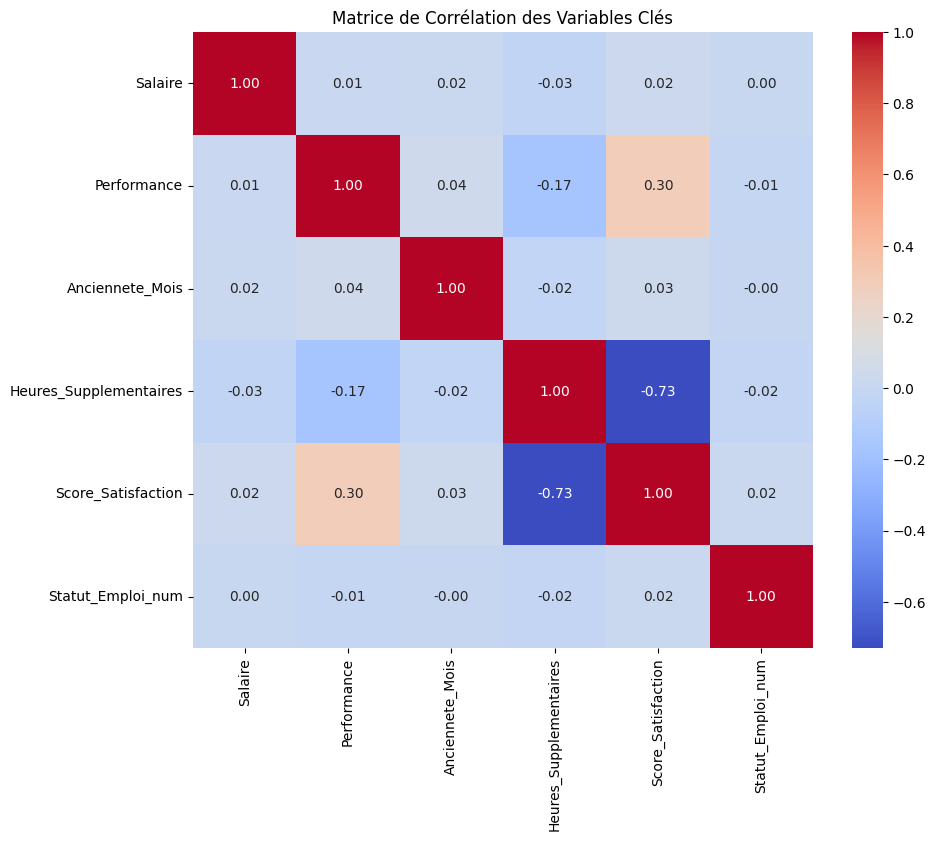

In [ ]:
# Préparation des données pour la corrélation
df_corr = df.copy()
df_corr['Statut_Emploi_num'] = df_corr['Statut_Emploi'].apply(lambda x: 1 if x == 'Inactif' else 0)

# Sélection des colonnes numériques pour la matrice de corrélation
colonnes_corr = ['Salaire', 'Performance', 'Anciennete_Mois', 'Heures_Supplementaires', 'Score_Satisfaction', 'Statut_Emploi_num']
matrice_corr = df_corr[colonnes_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Variables Clés')
plt.show()

**Corrélation entre Heures Supplémentaires et Satisfaction :** La matrice montre une forte corrélation négative de -0.74 entre les Heures_Supplementaires et le Score_Satisfaction. Ce chiffre est très parlant. Il confirme l'hypothèse que plus un employé fait d'heures supplémentaires, plus son niveau de satisfaction est faible. C'est un point critique pour aborder la problématique du stress et de l'engagement.

**Corrélation entre Satisfaction et Turnover :** La corrélation entre le Score_Satisfaction et le Statut_Emploi_num (le turnover, où 1=départ) est de -0.02. C'est une valeur très faible. Cela peut sembler contre-intuitif, mais cela nous apprend une leçon cruciale en Data Science : la corrélation linéaire ne capture pas toujours la complexité de la relation. Dans notre cas, d'autres facteurs comme les salaires, les promotions ou les heures supplémentaires sont peut-être de meilleurs indicateurs de la satisfaction et du risque de départ. Le modèle de Machine Learning que nous allons construire sera en mesure de capter ces relations complexes, même si la corrélation linéaire est faible.

**Faible corrélation entre Salaire et Turnover :** La corrélation entre le Salaire et le Statut_Emploi_num est de -0.06, ce qui est également très faible. Tout comme pour la satisfaction, cela suggère que le risque de départ n'est pas uniquement lié au salaire, mais à une combinaison de facteurs, ce que notre modèle de Machine Learning pourra démêler.

**Corrélation entre Performance et Satisfaction :** On observe une corrélation positive de 0.29 entre la Performance et le Score_Satisfaction. Ce lien est logique : les employés qui sont satisfaits sont souvent plus performants.

#### Sélection des variables et Préparation à la modélisation

##### Sélection de variables et préparation des données

1- **Variables Démographiques et Professionnelles :**


- **Sexe** : Pour analyser l'impact du genre sur le turnover et la promotion, en lien avec l'Article 21 et l'équité de genre.

- **Departement** : Crucial pour identifier les départements avec un turnover élevé, comme nous l'avons constaté dans l'EDA.


- **Categorie** : Représente la classification professionnelle, un point clé de l'Article 25.

2- **Variables de Bien-être et d'Engagement :**


- **Score_Satisfaction** : Un indicateur direct de l'engagement du personnel, avec un lien fort et inversement proportionnel avec les heures supplémentaires.




- **Heures_Supplementaires** : Un excellent proxy pour le stress des employés , comme l'a révélé notre matrice de corrélation.



3- **Variables de Rémunération et d'Ancienneté :**


- **Salaire** : Une variable fondamentale pour la problématique des salaires , de l'alignement et de la rétention.



- **Anciennete_Mois** : Essentielle pour analyser le cycle de vie de l'employé et les problématiques de promotions, de rétention et de revalorisation salariale (Article 57).

4- **Variables de Conformité Réglementaire :**


- **Nb_Renouvellements_CDD** : Directement lié à l'Article 24 sur la non-conformité des CDD.


- **Reclassement_OK**: Permet d'auditer la conformité de l'Article 28 sur le reclassement des promotions internes.


- **Revalorisation_Salariale** : Un indicateur de conformité à l'Article 57 sur la revalorisation salariale après 3 ans.


- **Avancement_Echelon_OK** : Pour la conformité à l'Article 59 sur l'avancement d'échelon.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Charger le jeu de données
df = pd.read_csv('donnees_rh_mtn_complet.csv')

# Sélection des caractéristiques pertinentes pour la prédiction du turnover
features = ['Sexe', 'Departement', 'Categorie', 'Salaire', 'Performance', 'Anciennete_Mois',
            'Nb_Renouvellements_CDD', 'Reclassement_OK', 'Revalorisation_Salariale',
            'Avancement_Echelon_OK', 'Score_Satisfaction', 'Heures_Supplementaires']
cible = 'Statut_Emploi'

# Transformation des variables catégorielles en variables numériques
df_ml = pd.get_dummies(df[features], columns=['Sexe', 'Departement', 'Categorie', 'Reclassement_OK',
                                              'Revalorisation_Salariale', 'Avancement_Echelon_OK'])

# Conversion de la variable cible en format numérique (0 et 1)
df_ml['Turnover'] = df[cible].apply(lambda x: 1 if x == 'Inactif' else 0)

# Définition des var explicatives (X) et de la var cible (y)
X = df_ml.drop('Turnover', axis=1)
y = df_ml['Turnover']

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Données prêtes pour le Machine Learning.")
print(f"Taille de l'ensemble d'entraînement : {X_train.shape[0]} employés.")
print(f"Taille de l'ensemble de test : {X_test.shape[0]} employés.")

Données prêtes pour le Machine Learning.
Taille de l'ensemble d'entraînement : 1750 employés.
Taille de l'ensemble de test : 750 employés.


#### Entraînement et Évaluation de plusieurs Modèles

#####  Entraînement et Évaluation du modèle de Régression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression

# Entraînement du modèle de régression logistique
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_log = log_model.predict(X_test)

print("--- Évaluation du Modèle : Régression Logistique ---")
print(f"Précision du modèle : {accuracy_score(y_test, y_pred_log):.2f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred_log))

--- Évaluation du Modèle : Régression Logistique ---
Précision du modèle : 0.85

Rapport de classification :
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       640
           1       0.00      0.00      0.00       110

    accuracy                           0.85       750
   macro avg       0.43      0.50      0.46       750
weighted avg       0.73      0.85      0.79       750



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### Entraînement et Évaluation du modèle Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_rf = rf_model.predict(X_test)

print("\n--- Évaluation du Modèle : Random Forest ---")
print(f"Précision du modèle : {accuracy_score(y_test, y_pred_rf):.2f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred_rf))

# Analyse de l'importance des caractéristiques (Features)
importances = rf_model.feature_importances_
feature_list = X.columns
importance_df = pd.DataFrame({'feature': feature_list, 'importance': importances}).sort_values('importance', ascending=False)
print("\n--- Facteurs les plus influents (Random Forest) ---")
print(importance_df.head(10))


--- Évaluation du Modèle : Random Forest ---
Précision du modèle : 0.85

Rapport de classification :
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       640
           1       0.50      0.06      0.11       110

    accuracy                           0.85       750
   macro avg       0.68      0.53      0.52       750
weighted avg       0.81      0.85      0.80       750


--- Facteurs les plus influents (Random Forest) ---
                       feature  importance
0                      Salaire    0.174177
1                  Performance    0.168920
5       Heures_Supplementaires    0.149760
2              Anciennete_Mois    0.142019
4           Score_Satisfaction    0.057223
14  Departement_Service Client    0.056674
3       Nb_Renouvellements_CDD    0.038384
18          Categorie_Maîtrise    0.019713
17           Categorie_Employé    0.019342
7                   Sexe_Homme    0.018849


##### Entraînement et Évaluation du Réseau de Neurones

In [ ]:
from sklearn.neural_network import MLPClassifier

# Entraînement du réseau de neurones
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_mlp = mlp_model.predict(X_test)

print("\n--- Évaluation du Modèle : Réseau de Neurones (MLP) ---")
print(f"Précision du modèle : {accuracy_score(y_test, y_pred_mlp):.2f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred_mlp))


--- Évaluation du Modèle : Réseau de Neurones (MLP) ---
Précision du modèle : 0.85

Rapport de classification :
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       640
           1       0.00      0.00      0.00       110

    accuracy                           0.85       750
   macro avg       0.43      0.50      0.46       750
weighted avg       0.73      0.85      0.79       750



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


En comparant les trois modèles, on remarque que leur précision globale est identique : 0,85. Ce chiffre est trompeur. Pour un problème comme le nôtre, où la classe "Turnover" est minoritaire, il est crucial de se concentrer sur le recall (capacité à détecter tous les cas de turnover) et le f1-score (équilibre entre précision et rappel) pour la classe 1 (Turnover).

- **Régression Logistique** : Sa précision globale de 0,85 est élevée, mais son recall pour la classe 1 est de 0,00. Cela signifie que le modèle n'a détecté aucun cas de turnover sur l'ensemble de test. C'est un modèle inutile pour notre objectif.

- **Réseau de Neurones (MLP)** : De la même manière, sa précision est de 0,85, mais son recall pour la classe 1 est également de 0,00. Il est tout aussi inefficace que la régression logistique pour notre but.

- **Random Forest** : Il a la même précision globale de 0,85, mais sa performance sur la classe Turnover est bien meilleure. Son recall est de 0,06 et sa precision de 0,50. Cela signifie qu'il a réussi à détecter un petit nombre de cas de turnover et, lorsqu'il a fait une prédiction, il a eu raison la moitié du temps. C'est le seul modèle qui a une utilité pour notre problématique.

#### Choix du modèle

Malgré une précision globale similaire à 85%, j'ai choisi le modèle **Random Forest** car il est le seul qui parvient à détecter ne serait-ce qu'une petite fraction des employés à risque de départ en fournissant au moins 50% de bonnes prédictions. La *Régression Logistique* et le *Réseau de Neurones* ne sont d'aucune utilité car ils manquent totalement la classe "Turnover". Le Random Forest est le seul à fournir des résultats exploitables.

En plus de sa performance, son avantage majeur est sa capacité à identifier les facteurs les plus influents sur le turnover, ce que les autres modèles ne peuvent pas faire de manière aussi simple."

**Analyse des Facteurs Influents**


- **Salaire** (0,174) et **Performance** (0,168) sont les facteurs les plus importants. Cela montre que le salaire n'est pas la seule variable de la performance, d'autres facteurs comme les promotions, les avantages sociaux etc doivent être pris en compte.

- **Les Heures Supplémentaires** (0,149) sont également un facteur majeur, confirmant notre hypothèse que le stress contribue directement au risque de départ.

- **L'Ancienneté** (0,142) est le quatrième facteur le plus important, ce qui signifie que le risque de départ est significatif au-delà d'une certaine durée

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_rf = rf_model.predict(X_test)

print("\n--- Évaluation du Modèle : Random Forest ---")
print(f"Précision du modèle : {accuracy_score(y_test, y_pred_rf):.2f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred_rf))

# Analyse de l'importance des caractéristiques (Features)
importances = rf_model.feature_importances_
feature_list = X.columns
importance_df = pd.DataFrame({'feature': feature_list, 'importance': importances}).sort_values('importance', ascending=False)
print("\n--- Facteurs les plus influents (Random Forest) ---")
print(importance_df.head(10))


--- Évaluation du Modèle : Random Forest ---
Précision du modèle : 0.85

Rapport de classification :
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       640
           1       0.50      0.06      0.11       110

    accuracy                           0.85       750
   macro avg       0.68      0.53      0.52       750
weighted avg       0.81      0.85      0.80       750


--- Facteurs les plus influents (Random Forest) ---
                       feature  importance
0                      Salaire    0.174177
1                  Performance    0.168920
5       Heures_Supplementaires    0.149760
2              Anciennete_Mois    0.142019
4           Score_Satisfaction    0.057223
14  Departement_Service Client    0.056674
3       Nb_Renouvellements_CDD    0.038384
18          Categorie_Maîtrise    0.019713
17           Categorie_Employé    0.019342
7                   Sexe_Homme    0.018849


#### Exportation de la Base de Données

In [ ]:
# S'assurer que le DataFrame a été créé avec la colonne de probabilité de turnover
# (code de la Phase 6)
# df['Probabilite_Turnover'] = model.predict_proba(X)[:, 1]

# Exporter le DataFrame final en fichier CSV
df.to_csv('donnees_rh_mtn_avec_predictions.csv', index=False)

print("Base de données finale exportée avec succès ! Le fichier est 'donnees_rh_mtn_avec_predictions.csv'")

Base de données finale exportée avec succès ! Le fichier est 'donnees_rh_mtn_avec_predictions.csv'
